In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [3]:
%autoreload

%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
import numpy as np

import darkhistory.physics as phys
from darkhistory.history.tla import get_history

import main
import config
from tqdm import tqdm_notebook as tqdm

In [32]:
fz_elec_decay = np.loadtxt('/Users/hongwan/Dropbox (MIT)/DM_IGM_Scattering/TLA_code/fz_electron_decay.dat', delimiter=',')

log10rs  = fz_elec_decay[0:70, 1]
log10eng = fz_elec_decay[0:2800:70, 0] 

log10f_elec_decay = {
    'H ion':   np.transpose(np.reshape(fz_elec_decay[0:2800,2], (40,70))),
    'He ion':  np.transpose(np.reshape(fz_elec_decay[2800:5600,2], (40,70))),
    'exc':   np.transpose(np.reshape(fz_elec_decay[5600:8400,2], (40,70))),
    'heat': np.transpose(np.reshape(fz_elec_decay[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_elec_decay[11200:14000,2], (40,70))) 
}

fz_phot_decay = np.loadtxt('/Users/hongwan/Dropbox (MIT)/DM_IGM_Scattering/TLA_code/fz_photon_decay.dat', delimiter=',')

log10rs  = fz_phot_decay[0:70, 1]
log10eng = fz_phot_decay[0:2800:70, 0] 

log10f_phot_decay = {
    'H ion':   np.transpose(np.reshape(fz_phot_decay[0:2800,2], (40,70))),
    'He ion':  np.transpose(np.reshape(fz_phot_decay[2800:5600,2], (40,70))),
    'exc':   np.transpose(np.reshape(fz_phot_decay[5600:8400,2], (40,70))),
    'heat': np.transpose(np.reshape(fz_phot_decay[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_phot_decay[11200:14000,2], (40,70)))
}

fz_elec_swave = np.loadtxt('/Users/hongwan/Dropbox (MIT)/21cm_DM/code/TLA_code/fz_electron_swave_NFW_no_subs.dat', delimiter=',')

log10rs  = fz_elec_swave[0:70, 1]
log10eng = fz_elec_swave[0:2800:70, 0] 

log10f_elec_swave = {
    'H ion':   np.transpose(np.reshape(fz_elec_swave[0:2800,2], (40,70))),
    'He ion':  np.transpose(np.reshape(fz_elec_swave[2800:5600,2], (40,70))),
    'exc':   np.transpose(np.reshape(fz_elec_swave[5600:8400,2], (40,70))),
    'heat': np.transpose(np.reshape(fz_elec_swave[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_elec_swave[11200:14000,2], (40,70))) 
}

fz_phot_swave = np.loadtxt('/Users/hongwan/Dropbox (MIT)/21cm_DM/code/TLA_code/fz_photon_swave_NFW_no_subs.dat', delimiter=',')

log10rs  = fz_phot_swave[0:70, 1]
log10eng = fz_phot_swave[0:2800:70, 0] 

log10f_phot_swave = {
    'H ion':   np.transpose(np.reshape(fz_phot_swave[0:2800,2], (40,70))),
    'He ion':  np.transpose(np.reshape(fz_phot_swave[2800:5600,2], (40,70))),
    'exc':   np.transpose(np.reshape(fz_phot_swave[5600:8400,2], (40,70))),
    'heat': np.transpose(np.reshape(fz_phot_swave[8400:11200,2], (40,70))),
    'cont':    np.transpose(np.reshape(fz_phot_swave[11200:14000,2], (40,70)))
}

f_data = {
    'elec': {'decay': log10f_elec_decay, 'swave': log10f_elec_swave},
    'phot': {'decay': log10f_phot_decay, 'swave': log10f_phot_swave}
}

In [33]:
def f_2016(eng, rs, pri, process, chan):
    interp_func = interp2d(log10eng, log10rs, f_data[pri][process][chan])
    return 10**interp_func(np.log10(eng), np.log10(rs))

In [7]:
%autoreload

rs_vec = 3000*np.exp(-.001*np.arange(6620))
eng_arr = 5e3*10**(np.arange(40)*0.23252559)
eng_arr[-1]=10**12.60150599

f_DH = {
    pri:{
        process: {
            chan: np.array([
                    phys.f_std(
                        (eng + phys.me)*2, rs_vec, inj_particle='elec', inj_type='decay', channel=chan
                    ) 
                    for eng in eng_arr
                ])
            for chan in ['H ion', 'He ion', 'exc', 'heat', 'cont']
        } for process in ['decay', 'swave']
    } for pri in ['elec', 'phot']
}

(40, 828, 5)
(40, 6620, 5)


In [53]:
levels_dict = {
    'elec':{
        'decay':{
            'H ion' : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1])),
            'He ion': np.log10(np.array([1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2])),
            'exc'   : np.log10(np.array([1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1, 2e-1])),
            'heat'  : np.log10(np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1])),
            'cont'  : np.log10(np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1]))
        },
        'swave':{
            'H ion' : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1])),
            'He ion': np.log10(np.array([1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2])),
            'exc'   : np.log10(np.array([1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1, 2e-1])),
            'heat'  : np.log10(np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1])),
            'cont'  : np.log10(np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1]))
        }
    },
    'phot':{
        'decay':{
            'H ion' : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1])),
            'He ion': np.log10(np.array([1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2])),
            'exc'   : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1])),
            'heat'  : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1])),
            'cont'  : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
        },
        'swave':{
            'H ion' : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1])),
            'He ion': np.log10(np.array([1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2])),
            'exc'   : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1])),
            'heat'  : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1])),
            'cont'  : np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
        }
    }      
}

labels_dict = {
    'elec':{
        'decay':{
            'H ion' : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'],
            'He ion': [r'$10^{-5}$', r'$5\times 10^{-5}$', r'$10^{-4}$', r'$5 \times 10^{-4}$', '0.001',  '0.005', '0.01'],
            'exc'   : ['0.001', '0.005', '0.01', '0.03', '0.05', '0.1', '0.3'],
            'heat'  : [r'$10^{-4}$', '0.001', '0.01', '0.05', '0.1', '0.3', '0.5'],
            'cont'  : [r'$10^{-4}$', '0.001', '0.01', '0.05', '0.1', '0.3', '0.5'],   
        },
        'swave':{
            'H ion' : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'],
            'He ion': [r'$10^{-5}$', r'$5\times 10^{-5}$', r'$10^{-4}$', r'$5 \times 10^{-4}$', '0.001',  '0.005', '0.01'],
            'exc'   : ['0.001', '0.005', '0.01', '0.03', '0.05', '0.1', '0.3'],
            'heat'  : [r'$10^{-4}$', '0.001', '0.01', '0.05', '0.1', '0.3', '0.5'],
            'cont'  : [r'$10^{-4}$', '0.001', '0.01', '0.05', '0.1', '0.3', '0.5'], 
        }
    },
    'phot':{
        'decay':{
            'H ion' : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'],
            'He ion': [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$5 \times 10^{-4}$', '0.001',  '0.005', '0.01'],
            'exc'   : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.03', '0.05', '0.1'],
            'heat'  : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'],
            'cont'  : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'], 
        },
        'swave':{
            'H ion' : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'],
            'He ion': [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$5 \times 10^{-4}$', '0.001',  '0.005', '0.01'],
            'exc'   : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.03', '0.05', '0.1'],
            'heat'  : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'],
            'cont'  : [r'$10^{-4}$', '0.001', '0.005', '0.01', '0.05', '0.1', '0.3'],
        }
    }      
}         

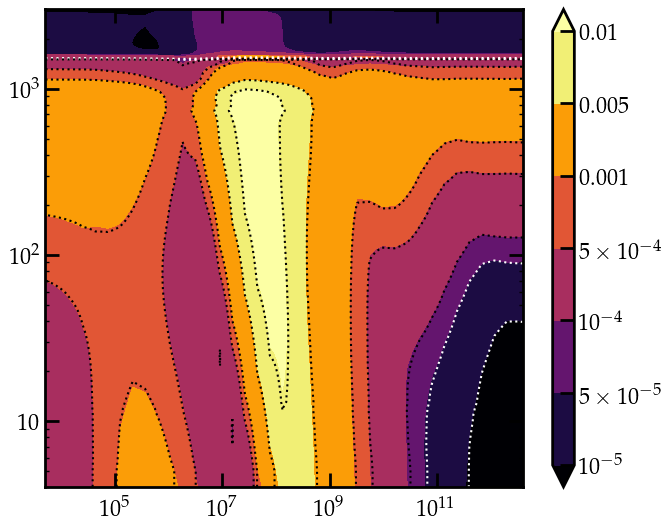

In [69]:
plt.figure(figsize=(7.7, 6.2))

plt.loglog()

ax = plt.gca()

pri = 'elec'
process = 'decay'
chan = 'He ion'

cntr1 = ax.contourf(
    eng_arr, 
    rs_vec, 
    np.transpose(np.log10(f_DH[pri][process][chan])), 
    levels=levels_dict[pri][process][chan],
    cmap=matplotlib.cm.inferno,
    extend='both'
)

cbar = plt.colorbar(cntr1, ax=ax, ticks=levels_dict[pri][process][chan])
cbar.set_ticklabels(labels_dict[pri][process][chan])

contour_colors = []
for i,_ in enumerate(levels_dict[pri][process][chan]):
    if i < 2:
        contour_colors.append('w')
    else:
        contour_colors.append('k')

plt.contour(
    eng_arr, rs_vec, np.flipud(np.log10(f_2016(eng_arr, rs_vec, pri, process, chan))), 
    levels= levels_dict[pri][process][chan], colors=contour_colors, linestyles='dotted', linewidths=1.5
)

In [ ]:


chan = 'H ion'

plt.figure(figsize=(7.7, 6.2))

plt.loglog()

if particle_type == 'phot':
    if inj_type == 'decay':
        if chan == 'H ion': 
            levels_f = np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$', 
                r'$0.05$', r'$0.1$', r'$0.3$'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]))
        elif chan == 'He ion':
            levels_f = np.log10(np.array([1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]))
            levels_f_labels = [
                r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$5 \times 10^{-4}$', 
                r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$'
            ]
            levels_f_c = np.log10(np.array([1e-8, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 1]))
        elif chan == 'exc':
            levels_f = np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$', 
                r'$0.03$', r'$0.05$', r'$0.1$'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1, 1]))
        elif chan == 'heat':
            levels_f = np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$', 
                r'$0.05$', r'$0.1$', r'$0.3$'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]))
        elif chan == 'cont':
            levels_f = np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', r'$5 \times 10^{-3}$', r'$0.01$', 
                r'$0.05$', r'$0.1$', r'$0.3$'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]))




ax = plt.gca()

cntr1 = ax.contourf(
    eng_arr, 
    rs_vec, 
    np.transpose(np.log10(f_phot_decay[chan])), 
    levels=levels_f_c,
#     norm=matplotlib.colors.LogNorm(),
    cmap=matplotlib.cm.inferno
)

cbar = plt.colorbar(cntr1, ax=ax, ticks=levels_f)
cbar.set_ticklabels(levels_f_labels)

if chan == 'H ion':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_H_ion(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
elif chan == 'He ion':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_He_ion(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
elif chan == 'exc':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_H_exc(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
elif chan == 'heat':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_heating(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
elif chan == 'cont':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_cont(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )

In [ ]:
rs_vec = 3000*np.exp(-.001*np.arange(6620))
eng_arr = 5e3*10**(np.arange(40)*0.23252559)
eng_arr[-1]=10**12.60150599

chan = 'H ion'

plt.figure(figsize=(7.7, 6.2))

plt.loglog()

if particle_type == 'elec':
    if inj_type == 'decay':
        process_text = r'$\chi \to e^+e^-$'
    else:
        process_text = r'$\chi \chi \to e^+e^-$'
elif particle_type == 'phot':
    if inj_type == 'decay':
        process_text = r'$\chi \to \gamma\gamma$'
    else:
        process_text = r'$\chi \chi \to \gamma\gamma$'
        

if particle_type == 'elec':
    if inj_type == 'decay':
        if chan == 'H ion': 
            levels_f = np.log10(np.array([1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', r'$5 \times 10^{-3}$', r'0.01', 
                '0.05', '0.1', '0.3'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]))
        elif chan == 'He ion':
            levels_f = np.log10(np.array([1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]))
            levels_f_labels = [
                r'$10^{-5}$', r'$5 \times 10^{-5}$', r'$10^{-4}$', r'$5 \times 10^{-4}$', 
                r'$10^{-3}$', r'0.005', r'0.01'
            ]
            levels_f_c = np.log10(np.array([1e-8, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 1]))
        elif chan == 'exc':
            levels_f = np.log10(np.array([1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1, 2e-1]))
            levels_f_labels = [
                r'$10^{-3}$', r'0.005', '0.01', 
                '0.03', '0.05', '0.1', '0.2'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-3, 5e-3, 1e-2, 3e-2, 5e-2, 1e-1, 2e-1, 1]))
        elif chan == 'heat':
            levels_f = np.log10(np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'0.001', r'0.005', r'0.01', 
                '0.05', '0.1', '0.3', '0.5'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1, 1]))
        elif chan == 'cont':
            levels_f = np.log10(np.array([1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1]))
            levels_f_labels = [
                r'$10^{-4}$', r'$10^{-3}$', '0.01', 
                '0.05', '0.1', '0.3', '0.5'
            ]
            levels_f_c = np.log10(np.array([1e-7, 1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 3e-1, 5e-1, 1]))




ax = plt.gca()

cntr1 = ax.contourf(
    eng_arr, 
    rs_vec, 
    np.transpose(np.log10(f_elec_decay[chan])), 
    levels=levels_f_c,
#     norm=matplotlib.colors.LogNorm(),
    cmap=matplotlib.cm.inferno
)

cbar = plt.colorbar(cntr1, ax=ax, ticks=levels_f)
cbar.set_ticklabels(levels_f_labels)

if chan == 'H ion':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_H_ion(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
    plt.title(r'$f_{\mathrm{H}_\mathrm{ion}}(z)$, '+process_text)
elif chan == 'He ion':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_He_ion(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
    plt.title(r'$f_{\mathrm{He}_\mathrm{ion}}(z)$, '+process_text)

elif chan == 'exc':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_H_exc(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
    plt.title(r'$f_\mathrm{exc}(z)$, '+process_text)

elif chan == 'heat':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_heating(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
    plt.title(r'$f_\mathrm{heat}(z)$, '+process_text)

elif chan == 'cont':
    plt.contour(
        eng_arr, rs_vec, np.flipud(f_cont(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )
    plt.title(r'$f_\mathrm{cont}(z)$, '+process_text)
    
plt.xlabel('Injected Particle Energy [eV]')
plt.ylabel(r'Redshift $(1+z)$')

In [ ]:
%autoreload
import main


# result = [
#     main.evolve(
#         primary='elec_delta',
#         DM_process='swave', mDM=(eng + phys.me), sigmav = 3e-29,
#         start_rs = 3000, end_rs=5.1,
#         coarsen_factor=12, backreaction=False,
#         struct_boost=phys.struct_boost_func('einasto_with_subs')
#     ) for eng in 10**np.arange(4, 7.25, 0.25)
# ]

result_decay = [
    main.evolve(
        primary='elec_delta',
        DM_process='decay', mDM=(eng + phys.me)*2, lifetime=3e26,
        start_rs = 3000, end_rs=5.1,
        coarsen_factor=12, backreaction=False
    ) for eng in 10**np.arange(5, 7.25, 0.25)
]

In [ ]:
f_ion_arr = np.array([res['f']['low']['H ion'] + res['f']['high']['H ion'] for res in result_decay])




In [ ]:
plt.figure()

plt.loglog()

ax = plt.gca()


cntr1 = ax.contourf(
    10**np.arange(5, 7.25, 0.25), 
    result_decay[0]['rs'], 
    np.transpose(np.log10(f_ion_arr)), 
    levels = np.log10([1e-7, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 3e-1, 1]),
#     norm=matplotlib.colors.LogNorm(),
    cmap=matplotlib.cm.inferno
)

plt.contour(
        eng_arr, rs_vec, np.flipud(f_H_ion(eng_arr, rs_vec)), 
        levels=10**levels_f, colors='k', linestyles='dotted', linewidths=1.5
    )

In [ ]:
f_ion_arr = np.array([res['f']['low']['H ion'] + res['f']['high']['H ion'] for res in result])
f_He_ion_arr = np.array([res['f']['low']['He ion'] for res in result])

f_heat_arr = np.array([res['f']['low']['heat'] + res['f']['high']['heat'] for res in result])

In [ ]:
import darkhistory.utilities as utils
utils.compare_arr([result[0]['f']['low']['H ion'], result[0]['f']['high']['H ion']])

In [ ]:
plt.figure()

plt.loglog()

plt.contour(10**np.arange(4, 7.25, 0.25), result[0]['rs'], np.transpose(f_He_ion_arr), 
#     levels=[0.01, 0.1, 0.3, 1, 10, 1e2, 1e3, 1e4]
    levels=[1e-4, 1e-3, 3e-3, 1e-2, 1e-1, 1, 10, 50]
)

plt.axis([5e3, 5e12, 4, 3000])

In [ ]:
plt.figure()

plt.loglog()

i = 8

plt.plot(result[i]['rs'], result[i]['f']['low']['H ion'])
plt.plot(result[i]['rs'], result[i]['f']['high']['H ion'])
plt.axis([4, 4000, 10**(-3.5), 1000])

In [ ]:
%autoreload
result_1 = main.evolve(
    primary='elec_delta',
    DM_process='decay', mDM=2*(10**6.556), lifetime = .5e25,
#     primary='phot_delta',
#     DM_process='decay', mDM=2*10**5.094, lifetime=.5e25,
    start_rs = 3000, end_rs=5.1,
    coarsen_factor=16, backreaction=False
)


In [ ]:
10**5.713

In [ ]:
from astropy.io import fits

file = '/Users/hongwan/Dropbox (MIT)/Photon Deposition/idl_comparison/GR_Checks/ih_continuous_elec/calcfracs_tf_z_3.000E+03_nstep_6398_logE_6.556E+00_xe_0.000E+00.fits'
# file = '/Users/hongwan/Dropbox (MIT)/Photon Deposition/idl_comparison/GR_Checks/ih_continuous_phot/calcfracs_tf_z_3.000E+03_nstep_6398_logE_5.094E+00_xe_0.000E+00.fits'
hdul = fits.open(file)
data = hdul[1].data
f_idl_low = data.field('loweng_deposition_fractions')[0]
f_idl_high = data.field('higheng_deposition_fractions')[0]
idl_redshift   = data.field('redshift')[0]
hdul.close()

In [ ]:
plt.figure()
plt.loglog()

plt.plot(result_1['rs'], result_1['f']['low']['H ion'])
plt.plot(idl_redshift, f_idl_low[0])

# plt.plot(result_1['rs'], result_1['f']['low']['heat'])
# plt.plot(idl_redshift, f_idl_low[3])

# plt.axis([10, 4000, 0.01, 1])


In [ ]:
result_decay = [
    main.evolve(
        primary='phot_delta',
        DM_process='decay', mDM=eng*2, lifetime=3e26,
        start_rs = 3000, end_rs=5.1,
        coarsen_factor=4, backreaction=False
    ) for eng in 10**np.arange(4, 7.25, 0.25)
]